# Data segmentation preparation

In this notebook we combine data segmentation and classification methods.

In [1]:
# os.getcwd() + '/../Dataset/fraud_oracle.csv'
# label is FraudFound_P

# to retrieve files
import os.path
# for logging purposes
import logging
# for mathematical calculations on lists and dataframes
import numpy as np
# for CSV and dataframe operations
import pandas as pd
# for plots
import matplotlib.pyplot as plt
# for mathematical calculations
import math
# import the label encoder from sklearn
from sklearn.preprocessing import LabelEncoder
# for training and testing split
from sklearn.model_selection import train_test_split
# for the decision tree
from sklearn.tree import DecisionTreeClassifier
# to export and save it to JPG later on
from sklearn.tree import export_graphviz
# to export the tree structure
from sklearn.tree.export import export_text
# to save the log file name
from datetime import datetime

end_run = False

file_name_time = datetime.utcnow().strftime('%Y-%m-%d_%H_%M_%S_%f')[:-3]

__file__ = 'Data_segmentation_prep_' + file_name_time

# initializing the logger
logging.basicConfig(filename=os.getcwd() + '/../Log_files/' + __file__ + '.log',
                    filemode='a',
                    format='%(asctime)s %(levelname)s %(message)s',
                    datefmt='%H:%M:%S',
                    level=logging.DEBUG)

logging.info("Initialized logger")
print("Initialized logger")

logging.info("File name time is " + file_name_time)
print("File name time is", file_name_time)

logging.info("#### Run started ####")

Initialized logger
File name time is 2023-10-03_07_10_38_449


C:\Users\berna\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Read the sorted data
data = pd.read_csv(os.getcwd() + '/../Dataset/fraud_oracle.csv')
logging.info("Successfully read the data")

In [3]:
# The top 5 most important features were identified to be:
# Age
# Month
# BasePolicy
# Fault
# Make

## Age

In [4]:
# storing the value counts
vc = data.Age.value_counts()
logging.info("Extracted Age value counts")

# convert the value counts to a list
list_vc = vc.tolist()
list_vc

# convert the value counts to another list
vc_numbers_list = vc.to_list()

# get the total number of claims in the dataset
total = data.shape[0]

# convert the value counts to percentage of the total number of claims
list_vc = [round(l/total * 100, 2) for l in list_vc]
logging.info("Created percentages")

In [5]:
# getting the labels
s = vc.index.tolist()

In [6]:
# setting the x-axis and printing it
yax = [str(text) + ', ' + str(occ) + ', ' + str(perc) + '%' for text, occ, perc in zip(s, vc_numbers_list, list_vc)]

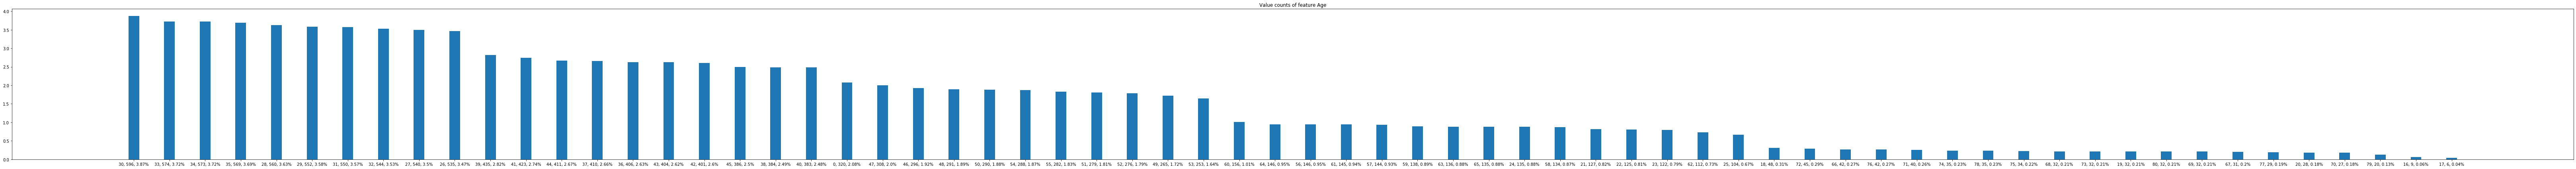

In [7]:
ticks = yax
data_for_plotting = list_vc
ind = np.arange(len(data_for_plotting))
fig = plt.figure(figsize=(90, 6), tight_layout=True) # need tight_layout to make everything fit
ax = plt.subplot(1, 1, 1)
ax.bar(ind, data_for_plotting, 0.3, align='center', label="%")
# plt.legend() - legend is useless in this plot
plt.title('Value counts of feature Age')
y_pos = range(len(yax))
plt.xticks(y_pos, yax)
plt.draw()  # this is needed because get_window_extent needs a renderer to work
plt.savefig(os.getcwd() + '/../Plots/age_value_counts_' + file_name_time + '.png')
logging.info("Plotted and saved graph")
plt.draw()
plt.show()

## Month

In [8]:
# storing the value counts
vc = data.Month.value_counts()
logging.info("Extracted Month value counts")

# convert the value counts to a list
list_vc = vc.tolist()
list_vc

# convert the value counts to another list
vc_numbers_list = vc.to_list()

# get the total number of claims in the dataset
total = data.shape[0]

# convert the value counts to percentage of the total number of claims
list_vc = [round(l/total * 100, 2) for l in list_vc]
logging.info("Created percentages")

In [9]:
# getting the labels
s = vc.index.tolist()

In [10]:
# setting the x-axis and printing it
yax = [str(text) + ', ' + str(occ) + ', ' + str(perc) + '%' for text, occ, perc in zip(s, vc_numbers_list, list_vc)]

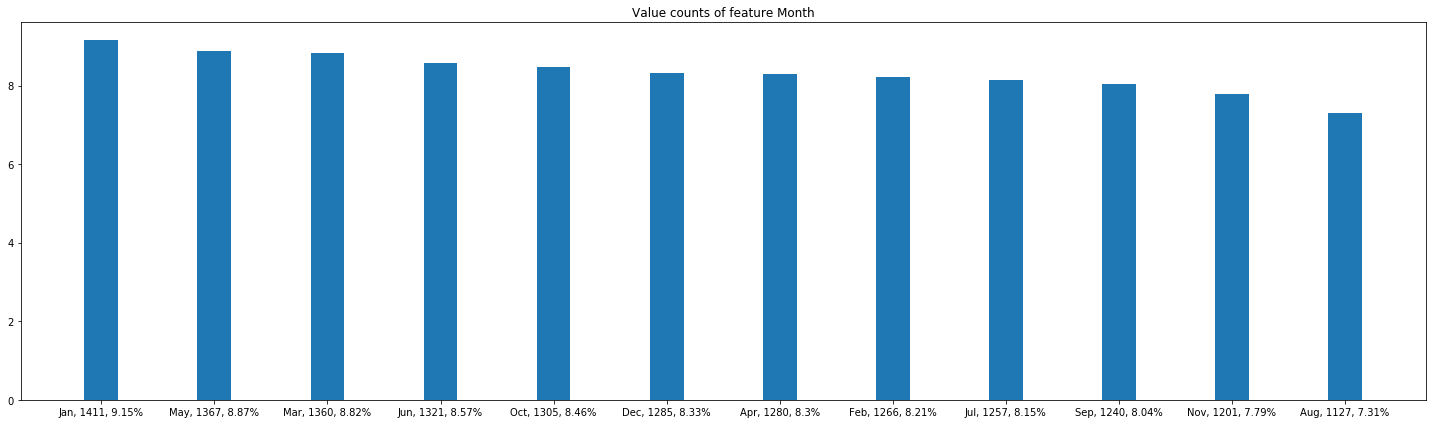

In [11]:
ticks = yax
data_for_plotting = list_vc
ind = np.arange(len(data_for_plotting))
fig = plt.figure(figsize=(20, 6), tight_layout=True) # need tight_layout to make everything fit
ax = plt.subplot(1, 1, 1)
ax.bar(ind, data_for_plotting, 0.3, align='center', label="%")
# plt.legend() - legend is useless in this plot
plt.title('Value counts of feature Month')
y_pos = range(len(yax))
plt.xticks(y_pos, yax)
plt.draw()  # this is needed because get_window_extent needs a renderer to work
plt.savefig(os.getcwd() + '/../Plots/month_value_counts_' + file_name_time + '.png')
logging.info("Plotted and saved graph")
plt.draw()
plt.show()

## BasePolicy

In [12]:
# storing the value counts
vc = data.BasePolicy.value_counts()
logging.info("Extracted the BasePolicy value counts")

# convert the value counts to a list
list_vc = vc.tolist()
list_vc

# convert the value counts to another list
vc_numbers_list = vc.to_list()

# get the total number of claims in the dataset
total = data.shape[0]

# convert the value counts to percentage of the total number of claims
list_vc = [round(l/total * 100, 2) for l in list_vc]
logging.info("Created percentages")

In [13]:
# getting the labels
s = vc.index.tolist()

In [14]:
# setting the x-axis and printing it
yax = [str(text) + ', ' + str(occ) + ', ' + str(perc) + '%' for text, occ, perc in zip(s, vc_numbers_list, list_vc)]

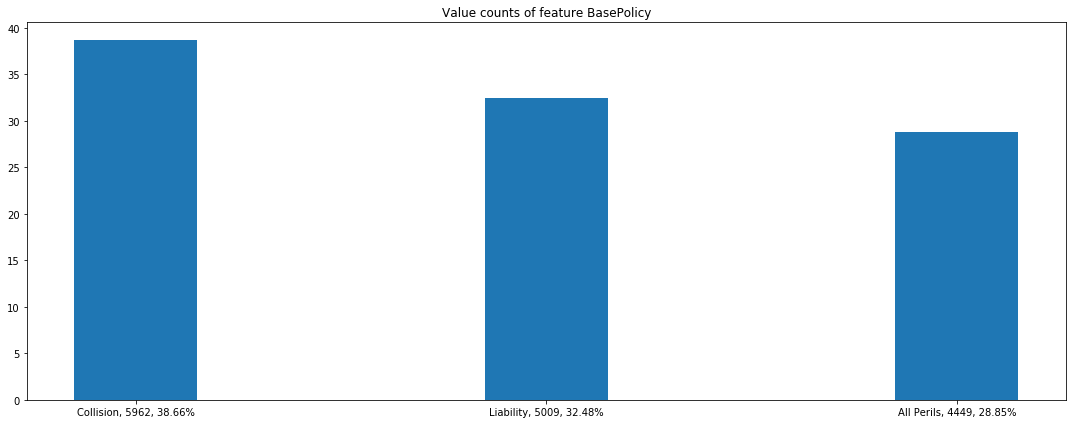

In [15]:
ticks = yax
data_for_plotting = list_vc
ind = np.arange(len(data_for_plotting))
fig = plt.figure(figsize=(15, 6), tight_layout=True) # need tight_layout to make everything fit
ax = plt.subplot(1, 1, 1)
ax.bar(ind, data_for_plotting, 0.3, align='center', label="%")
# plt.legend() - legend is useless in this plot
plt.title('Value counts of feature BasePolicy')
y_pos = range(len(yax))
plt.xticks(y_pos, yax)
plt.draw()  # this is needed because get_window_extent needs a renderer to work
plt.savefig(os.getcwd() + '/../Plots/basepolicy_value_counts_' + file_name_time + '.png')
logging.info("Plotted and saved graph")
plt.draw()
plt.show()

## Fault

In [16]:
# storing the value counts
vc = data.Fault.value_counts()
logging.info("Extracted the Fault value counts")

# convert the value counts to a list
list_vc = vc.tolist()
list_vc

# convert the value counts to another list
vc_numbers_list = vc.to_list()

# get the total number of claims in the dataset
total = data.shape[0]

# convert the value counts to percentage of the total number of claims
list_vc = [round(l/total * 100, 2) for l in list_vc]
logging.info("Created percentages")

In [17]:
# getting the labels
s = vc.index.tolist()

In [18]:
# setting the x-axis and printing it
yax = [str(text) + ', ' + str(occ) + ', ' + str(perc) + '%' for text, occ, perc in zip(s, vc_numbers_list, list_vc)]

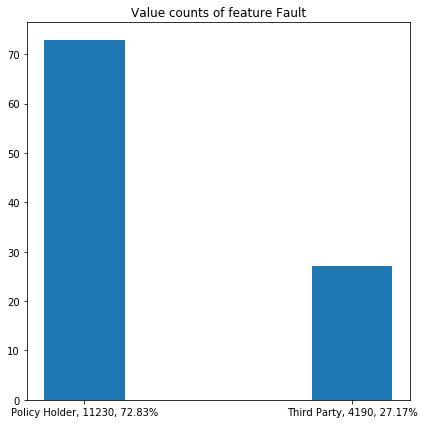

In [19]:
ticks = yax
data_for_plotting = list_vc
ind = np.arange(len(data_for_plotting))
fig = plt.figure(figsize=(6, 6), tight_layout=True) # need tight_layout to make everything fit
ax = plt.subplot(1, 1, 1)
ax.bar(ind, data_for_plotting, 0.3, align='center', label="%")
# plt.legend() - legend is useless in this plot
plt.title('Value counts of feature Fault')
y_pos = range(len(yax))
plt.xticks(y_pos, yax)
plt.draw()  # this is needed because get_window_extent needs a renderer to work
plt.savefig(os.getcwd() + '/../Plots/fault_value_counts_' + file_name_time + '.png')
logging.info("Plotted and saved graph")
plt.draw()
plt.show()

## Make

In [20]:
# storing the value counts
vc = data.Make.value_counts()
logging.info("Extracted the Make value counts")

# convert the value counts to a list
list_vc = vc.tolist()
list_vc

# convert the value counts to another list
vc_numbers_list = vc.to_list()

# get the total number of claims in the dataset
total = data.shape[0]

# convert the value counts to percentage of the total number of claims
list_vc = [round(l/total * 100, 2) for l in list_vc]
logging.info("Created percentages")

In [21]:
# getting the labels
s = vc.index.tolist()

In [22]:
# setting the x-axis and printing it
yax = [str(text) + ', ' + str(occ) + ', ' + str(perc) + '%' for text, occ, perc in zip(s, vc_numbers_list, list_vc)]

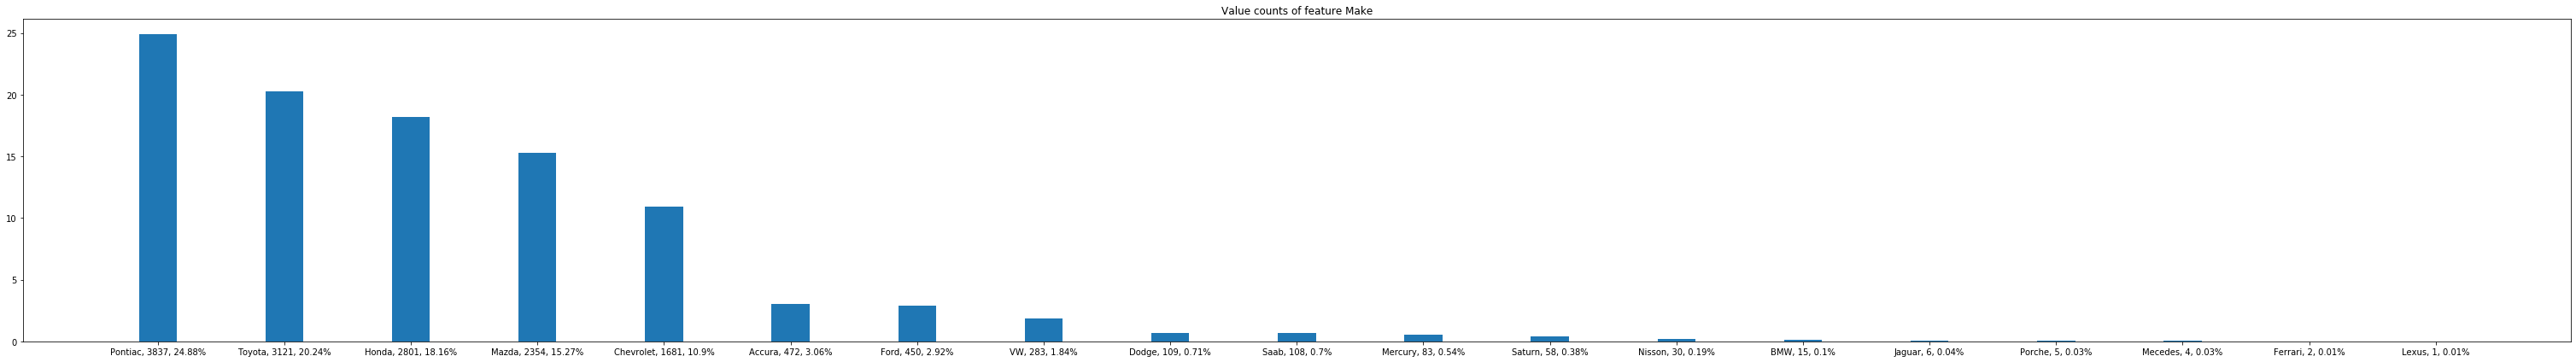

In [23]:
ticks = yax
data_for_plotting = list_vc
ind = np.arange(len(data_for_plotting))
fig = plt.figure(figsize=(42, 6), tight_layout=True) # need tight_layout to make everything fit
ax = plt.subplot(1, 1, 1)
ax.bar(ind, data_for_plotting, 0.3, align='center', label="%")
# plt.legend() - legend is useless in this plot
plt.title('Value counts of feature Make')
y_pos = range(len(yax))
plt.xticks(y_pos, yax)
plt.draw()  # this is needed because get_window_extent needs a renderer to work
plt.savefig(os.getcwd() + '/../Plots/make_value_counts_' + file_name_time + '.png')
logging.info("Plotted and saved graph")
plt.draw()
plt.show()

From the above investigations, we can conclude that in our opinion, the features with the most distinctive power are Age, Fault and Make. Thus, we will continue our investigation based on these three features.

For the bar charts that follow, we use code from https://www.pythoncharts.com/matplotlib/stacked-bar-charts-labels/

## Age

In [49]:
# group by age and the label
plot_data = data.groupby(['Age', 'FraudFound_P']).size().unstack()
logging.info("Grouped by age and label")

# convert the columns to a list
col = plot_data.columns.tolist()
print(col)

# reset the column names
plot_data.columns = ['Non_fradulent', 'Fraud']

print(plot_data.columns)
logging.info("Reset the columns to new names")

# convert the nan values to 0
plot_data = plot_data.fillna(0)
logging.info("Converted the missing values to 0 since these are cases were there are no Fraud/Non_fraudulent claims for that particular age")

print(plot_data)
print(plot_data.index)

[0, 1]
Index(['Non_fradulent', 'Fraud'], dtype='object')
     Non_fradulent  Fraud
Age                      
0            289.0   31.0
16             8.0    1.0
17             5.0    1.0
18            40.0    8.0
19            27.0    5.0
..             ...    ...
76            39.0    3.0
77            28.0    1.0
78            33.0    2.0
79            19.0    1.0
80            31.0    1.0

[66 rows x 2 columns]
Int64Index([ 0, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
            32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
            49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
            66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80],
           dtype='int64', name='Age')


We will now convert all values to integer to remove the decimal point

In [50]:
# convert to integer to remove the decimal point
plot_data['Fraud'] = plot_data['Fraud'].astype(int)
plot_data['Non_fradulent'] = plot_data['Non_fradulent'].astype(int)

logging.info("Converted columns to integer to remove the decimal point")

plot_data.head(5)

,Non_fradulent,Fraud
Age,,
0,289,31
16,8,1
17,5,1
18,40,8
19,27,5


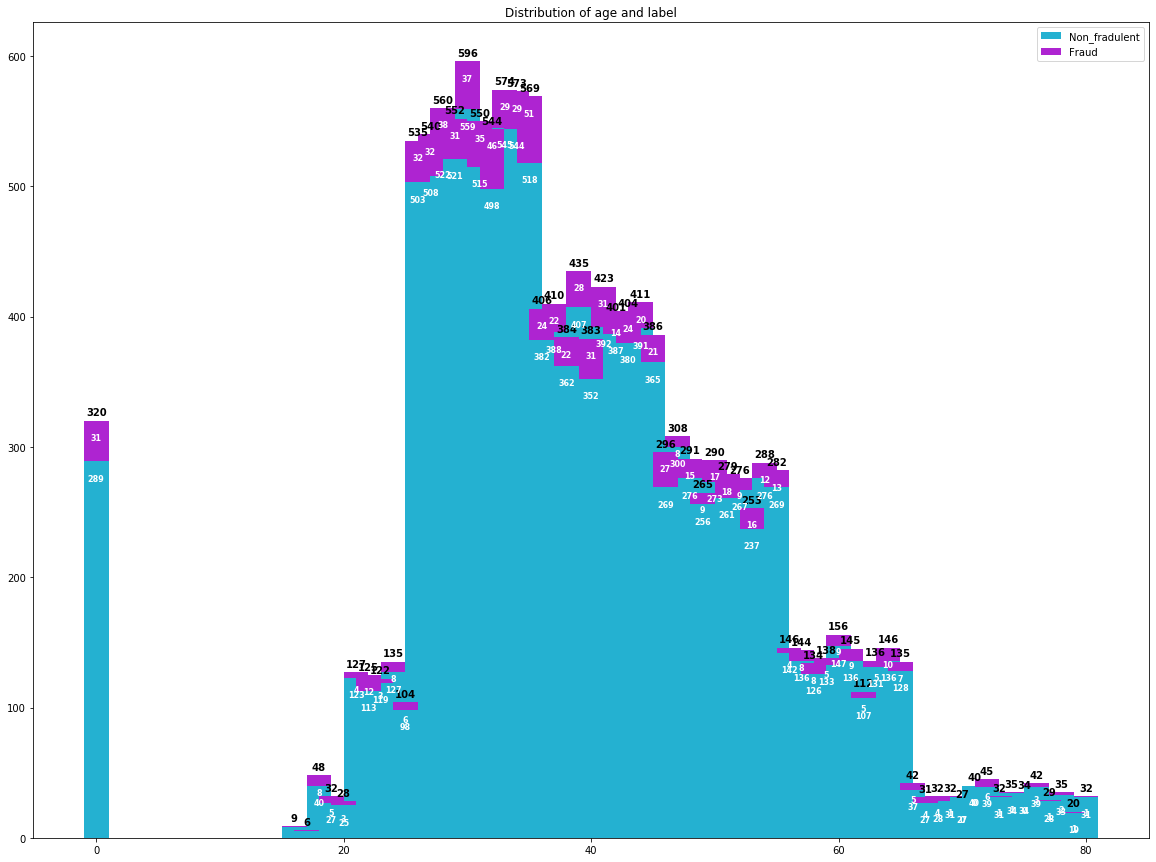

In [92]:
fig, ax = plt.subplots(figsize=(30, 15))

# BM
# fig.subplots_adjust(bottom=0.7) 
# plt.tick_params(axis='x', which='major', labelsize=10)
# fig.tight_layout()

colors = ['#24b1d1', '#ae24d1']
bottom = np.zeros(len(plot_data))

for i, col in enumerate(plot_data.columns):
  ax.bar(
      plot_data.index, plot_data[col], bottom=bottom, label=col, color=colors[i], width=2, align='center')
  bottom += np.array(plot_data[col])

# The totals for each age
totals = plot_data.sum(axis=1)
y_offset = 4
# Printing the totals in the bar chart
for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset, round(total), ha='center',
          weight='bold')

# Let's put the annotations inside the bars themselves by using a
# negative offset.
y_offset = -15
# For each patch (basically each rectangle within the bar), add a label.
for bar in ax.patches:
  ax.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
      math.trunc(bar.get_height()),
      # Center the labels and style them a bit.
      ha='center',
      color='w',
      weight='bold',
      size=8
  )

ax.set_title('Distribution of age and label')
ax.legend()

logging.info("Plotted the distribution bar chart")


In [ ]:
if end_run is True:
    logging.info("#### Run finished ####")
    # close the logger
    logging.shutdown()